In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



# Características musicales del urbano español

In [3]:
genres_df = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/data/data_by_genres.csv')

In [4]:
# Filtrar el género "urbano español"
urbano_espanol_df = genres_df[genres_df['genres'].str.contains('urbano espanol', case=False, na=False)]

# Verificar el dataframe filtrado
urbano_espanol_df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
2834,1,urbano espanol,0.175225,0.789,206417.75,0.63075,0.017831,0.07165,-6.93925,0.135625,114.00575,0.55925,75.25,1


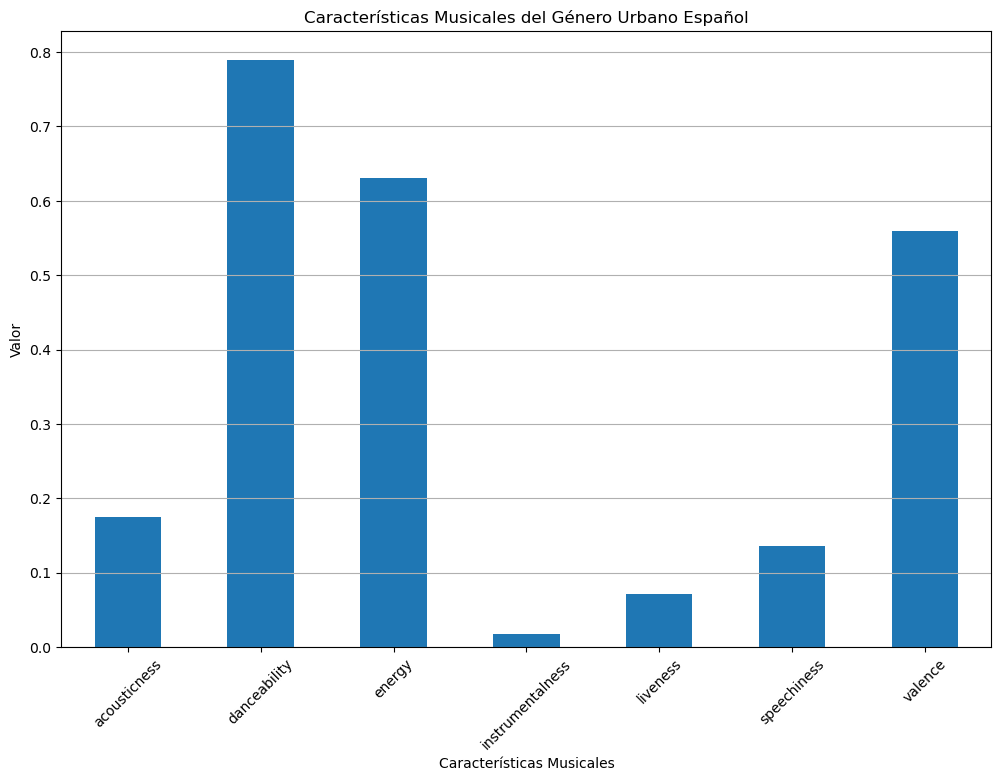

In [5]:
# Seleccionar columnas de características musicales
caracteristicas_musicales = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Extraer los valores de las características musicales
valores_caracteristicas = urbano_espanol_df[caracteristicas_musicales].iloc[0]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
valores_caracteristicas.plot(kind='bar')

plt.xlabel('Características Musicales')
plt.ylabel('Valor')
plt.title('Características Musicales del Género Urbano Español')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()



In [6]:
# Guardar archivo en csv
urbano_espanol_df.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/urbano_espanol.csv', index=False)

# Artistas españoles

In [15]:
artistas_espanoles = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs/artistas_espanoles.csv')

In [14]:
artistas_espanoles.shape

(5050, 16)

### Distribución de géneros musicales

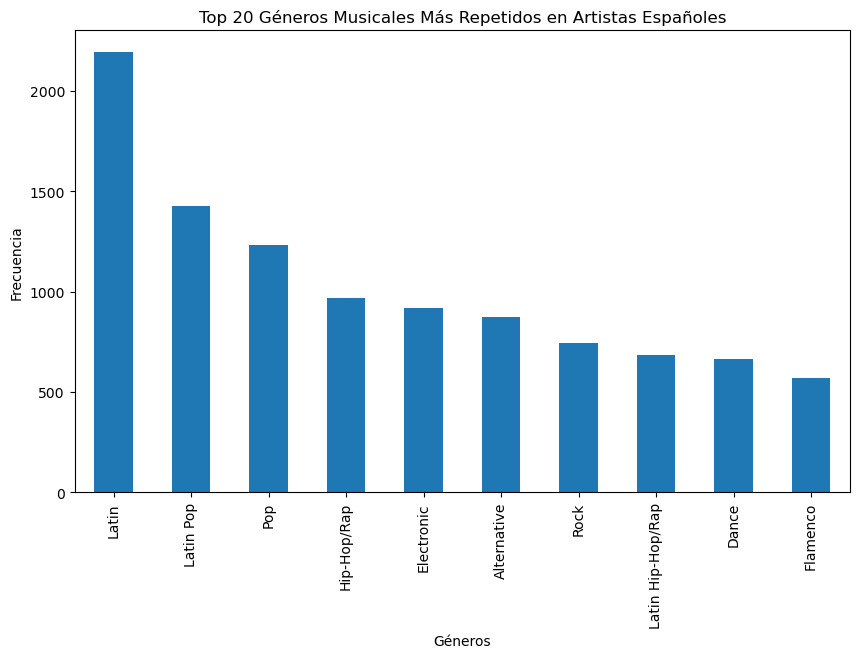

In [16]:
# Crear una copia de la columna 'Géneros' y separar los géneros
generos = artistas_espanoles['Géneros'].str.split(', ').explode()

# Contar la frecuencia de cada género
genre_count = generos.value_counts()

# Filtrar los 20 géneros más repetidos
top_genres = genre_count.head(10)

# Visualizar la distribución de los 20 géneros más repetidos con un gráfico de barras
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar')
plt.title('Top 20 Géneros Musicales Más Repetidos en Artistas Españoles')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Artistas femeninas españolas

In [9]:
artistas_fem_cleaned = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs/artistas_fem_cleaned.csv')

### Distribución de géneros musicales

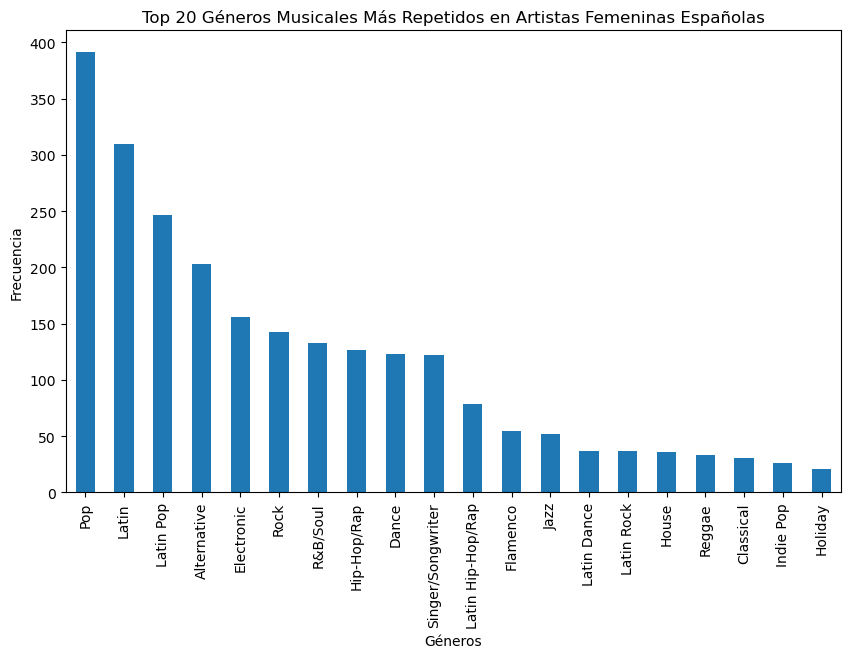

In [10]:
# Crear una copia de la columna 'Géneros' y separar los géneros
generos_expandidos = artistas_fem_cleaned['Géneros'].str.split(', ').explode()

# Contar la frecuencia de cada género
genre_counts = generos_expandidos.value_counts()

# Filtrar los 20 géneros más repetidos
top_20_genres = genre_counts.head(20)

# Visualizar la distribución de los 20 géneros más repetidos con un gráfico de barras
plt.figure(figsize=(10, 6))
top_20_genres.plot(kind='bar')
plt.title('Top 20 Géneros Musicales Más Repetidos en Artistas Femeninas Españolas')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Top artistas género urbano

In [11]:
data = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/top_artistas_urbano.csv')

In [12]:
data.head()

,Chartmetric ID,Artista,País,Región,Continente,Pronombres,Solista/Grupo,Géneros,Puntuación en Chartmetric,Clasificación en Chartmetric,...,Seguidores en Instagram,Engagement en Instagram,Apariciones en radio,Seguidores de Facebook,Visualizaciones en Wikipedia,Songkick Fans,Visitas a la página de Genius,Enlace de Spotify,Primera fecha de lanzamiento,Última fecha de lanzamiento
0,3884730,SAIKO,España,Southern Europe,Europe,He/Him,Artistas solistas,"Latin Hip-Hop/Rap, Latin Pop, R&B/Soul, Latin",64059,727.0,...,742713.0,17.7786,48475.0,1122.0,NaN,103889.0,72981.0,https://open.spotify.com/artist/10jgN4QU0ROkxU...,"Feb 24, 2020","May 9, 2024"
1,1428885,Morad,España,Southern Europe,Europe,He/Him,Artistas solistas,"Latin Hip-Hop/Rap, Latin",56383,868.0,...,3632120.0,9.2745,33378.0,-1.0,241.0,114403.0,458766.0,https://open.spotify.com/artist/3U31MyHhxbcvED...,"Jan 1, 2010","May 24, 2024"
2,214141,C. Tangana,España,Southern Europe,Europe,He/Him,Artistas solistas,"Latin Hip-Hop/Rap, Latin Pop, Latin",37905,1572.0,...,1751509.0,7.1061,60222.0,346671.0,258.0,279755.0,1004976.0,https://open.spotify.com/artist/5TYxZTjIPqKM8K...,"Jun 2, 2011","Jul 7, 2023"
3,256665,Omar Montes,España,Southern Europe,Europe,He/Him,Artistas solistas,"Flamenco, Latin Pop, Latin Hip-Hop/Rap, Latin",35882,1711.0,...,1668973.0,9.8969,48176.0,173182.0,700.0,61225.0,62531.0,https://open.spotify.com/artist/6DBzAAs0oaj5NB...,"Jul 11, 2016","May 9, 2024"
4,740467,JC Reyes,España,Southern Europe,Europe,He/Him,Desconocido,"Latin Hip-Hop/Rap, Latin",39860,1479.0,...,622605.0,7.5777,4023.0,339.0,14.0,43524.0,9457.0,https://open.spotify.com/artist/0FwnPHExlRRxEZ...,"May 22, 2017","May 21, 2024"


### Correlación entre variables numéricas

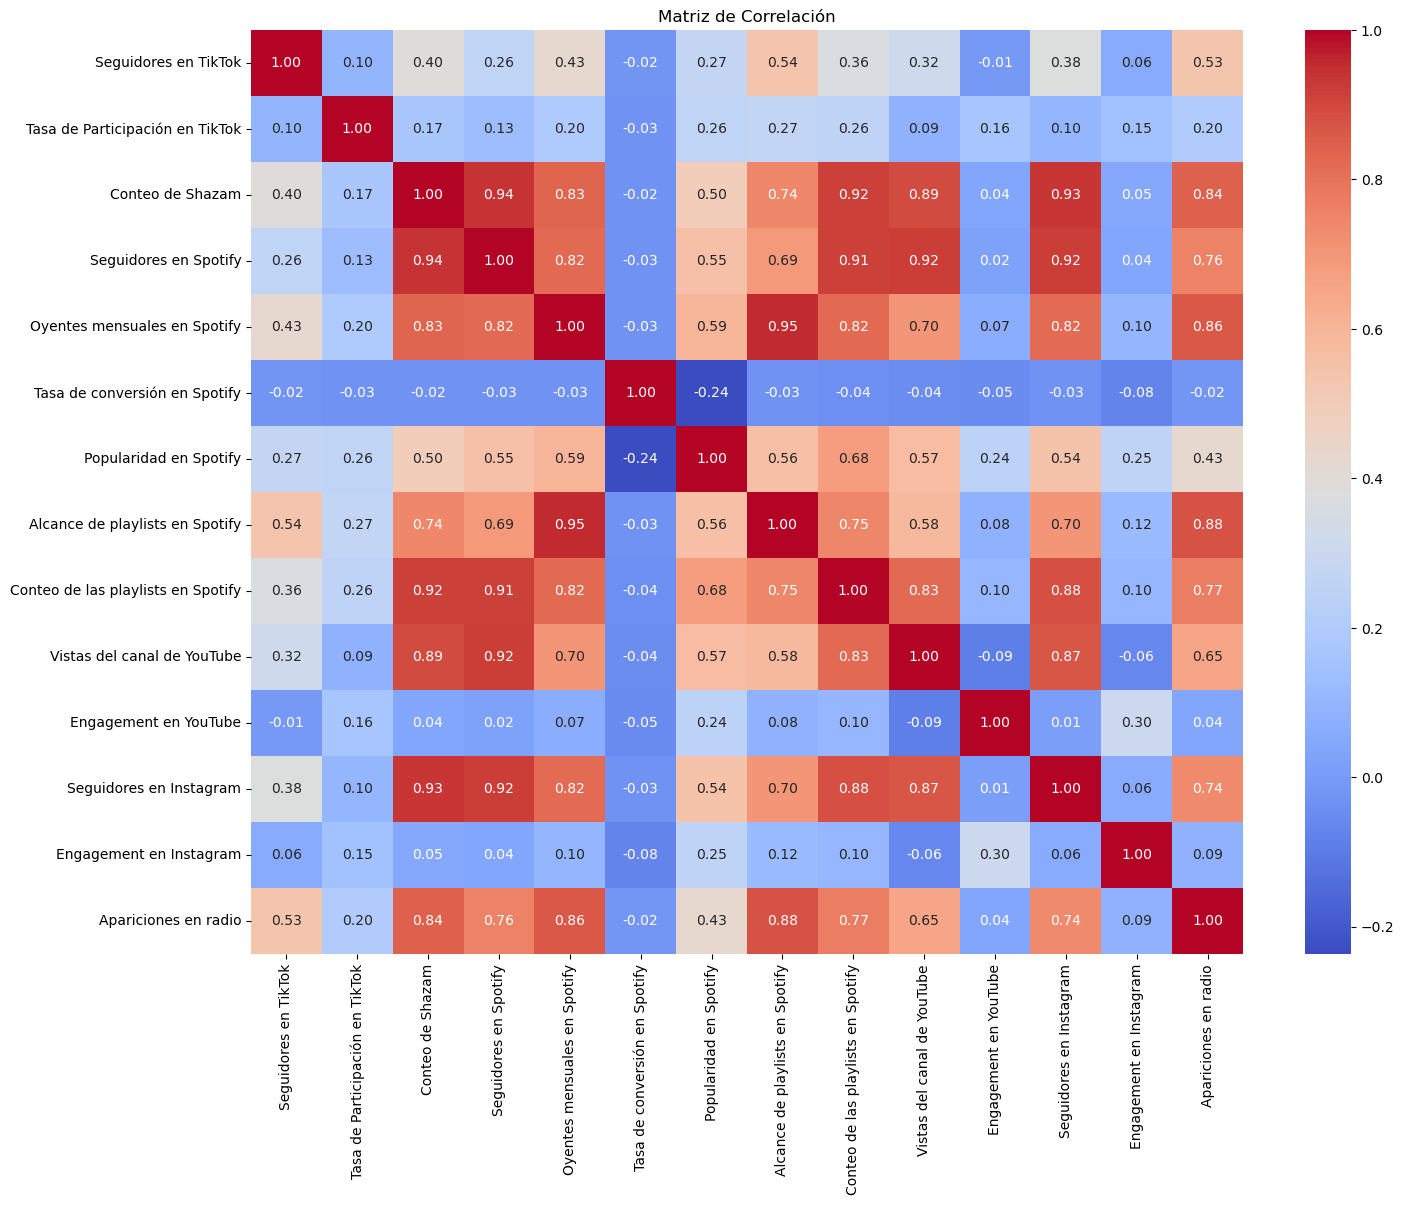

In [16]:
columnas_numericas = ['Seguidores en TikTok',
    'Tasa de Participación en TikTok',
    'Conteo de Shazam', 'Seguidores en Spotify', 'Oyentes mensuales en Spotify', 
    'Tasa de conversión en Spotify', 'Popularidad en Spotify', 'Alcance de playlists en Spotify', 
    'Conteo de las playlists en Spotify',
    'Vistas del canal de YouTube', 'Engagement en YouTube',
    'Seguidores en Instagram', 'Engagement en Instagram', 
    'Apariciones en radio'
]

# Calcular la matriz de correlación
correlacion = data[columnas_numericas].corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Correlación entre Spotify y TikTok

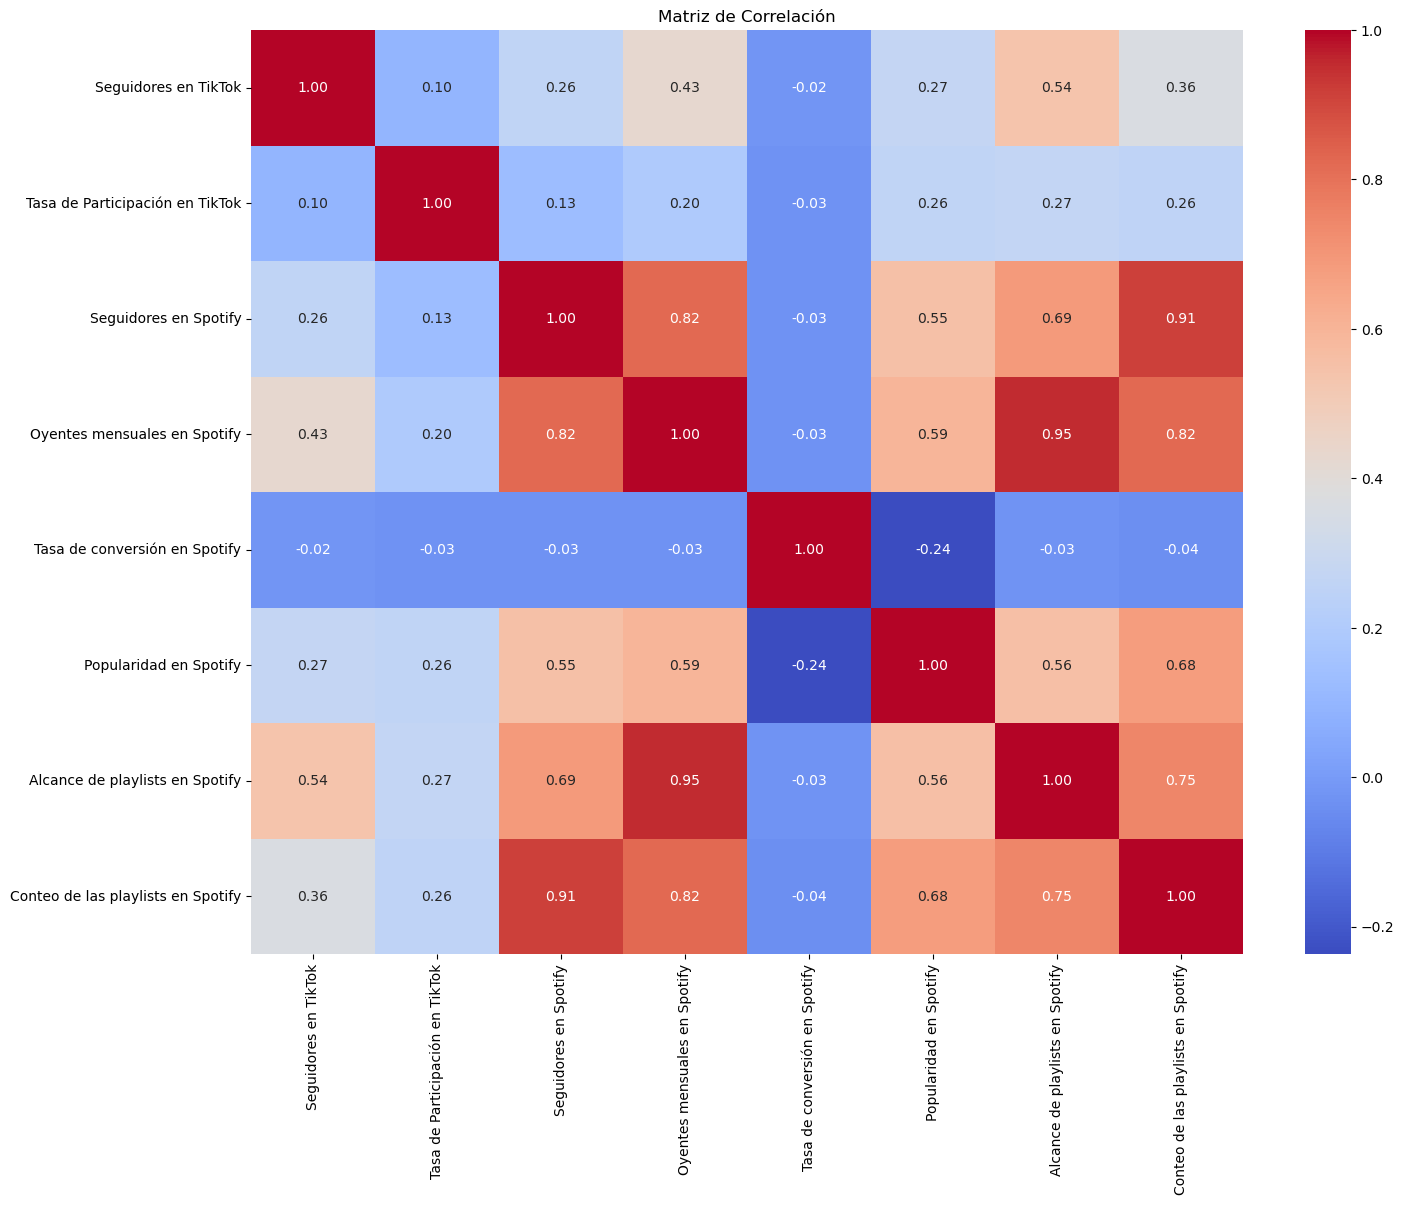

In [17]:
columnas_spoti_tiktok = ['Seguidores en TikTok',
    'Tasa de Participación en TikTok', 'Seguidores en Spotify', 'Oyentes mensuales en Spotify', 
    'Tasa de conversión en Spotify', 'Popularidad en Spotify', 'Alcance de playlists en Spotify', 
    'Conteo de las playlists en Spotify',
]

# Calcular la matriz de correlación
correlacion_spoti_tiktok = data[columnas_spoti_tiktok].corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlacion_spoti_tiktok, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Momentum Reciente vs Seguidores en Spotify

In [ ]:
# Momentum reciente vs Seguidores en Spotify
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Momentum Reciente', y='Seguidores en Spotify', data=data)
plt.title('Momentum Reciente vs Seguidores en Spotify')
plt.show()

### Seguidores medios por plataforma

In [ ]:
# Identificar las columnas que contienen datos de seguidores en diferentes plataformas
follower_columns = [
    'Seguidores en TikTok', 'Seguidores en Spotify', 'Seguidores en Instagram', 
    'Seguidores en SoundCloud'
]

# Calcular el promedio de seguidores para cada plataforma
follower_averages = data[follower_columns].mean()

# Crear un DataFrame con los promedios para facilitar la creación del gráfico
follower_averages_df = pd.DataFrame({
    'Plataforma': follower_averages.index,
    'Seguidores Medios': follower_averages.values
})

# Crear un gráfico de barras para mostrar los seguidores medios por plataforma
plt.figure(figsize=(14, 8))
sns.barplot(x='Plataforma', y='Seguidores Medios', data=follower_averages_df)
plt.title('Seguidores Medios por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Seguidores Medios')
plt.show()

### Comparativa entre oyentes mensuales medios y seguidores en Spotify

In [ ]:
# Calcular el promedio de oyentes mensuales y seguidores en Spotify
average_listeners = data['Oyentes mensuales en Spotify'].mean()
average_followers = data['Seguidores en Spotify'].mean()

# Crear un DataFrame con estos promedios para facilitar la creación del gráfico
average_data = pd.DataFrame({
    'Métrica': ['Oyentes Mensuales', 'Seguidores'],
    'Promedio': [average_listeners, average_followers]
})

# Crear un gráfico de barras para comparar los oyentes medios y seguidores medios en Spotify
plt.figure(figsize=(10, 6))
sns.barplot(x='Métrica', y='Promedio', data=average_data)
plt.title('Comparación de Oyentes Medios y Seguidores Medios en Spotify')
plt.xlabel('Métrica')
plt.ylabel('Promedio')
plt.show()

### Engagement Medio por Plataforma

In [ ]:
plt.figure(figsize=(14, 8))
engagement_columns = ['Tasa de Participación en TikTok', 'Engagement en Instagram', 'Engagement en YouTube']
engagement_averages = data[engagement_columns].mean().reset_index()
engagement_averages.columns = ['Plataforma', 'Engagement Medio']
sns.barplot(x='Plataforma', y='Engagement Medio', data=engagement_averages)
plt.title('Engagement Medio por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Engagement Medio')
plt.show()

### Conteo Medio de Playlists por Plataforma

In [ ]:
plt.figure(figsize=(14, 8))
playlist_columns = ['Conteo de las playlists en Spotify', 'Conteo de playlists en Deezer', 'Conteo de playlists en iTunes', 'Conteo de playlists en Amazon']
playlist_averages = data[playlist_columns].mean().reset_index()
playlist_averages.columns = ['Plataforma', 'Conteo Medio de Playlists']
sns.barplot(x='Plataforma', y='Conteo Medio de Playlists', data=playlist_averages)
plt.title('Conteo Medio de Playlists por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Conteo Medio de Playlists')
plt.show()

# Distribución por género

In [ ]:
# Contar la frecuencia de cada pronombre
pronouns_counts = data['Pronombres'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(pronouns_counts, labels=pronouns_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Género basada en Pronombres')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

### Nuevo DataFrame solo de mujeres 

In [ ]:
data_women = data[data['Pronombres'] == 'She/Her']
data_women.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/data_women.csv', index=False)

### Oyentes mensuales por género

In [ ]:
plt.figure(figsize=(10, 6))
gender_spotify_listeners = data.groupby('Pronombres')['Oyentes mensuales en Spotify'].mean().reset_index()
sns.barplot(x='Pronombres', y='Oyentes mensuales en Spotify', data=gender_spotify_listeners)
plt.title('Promedio de Oyentes Mensuales en Spotify por Género')
plt.xlabel('Género')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.show()

### Engagement en TikTok por género

In [ ]:
plt.figure(figsize=(10, 6))
gender_tiktok_engagement = data.groupby('Pronombres')['Tasa de Participación en TikTok'].mean().reset_index()
sns.barplot(x='Pronombres', y='Tasa de Participación en TikTok', data=gender_tiktok_engagement)
plt.title('Promedio de Tasa de Participación en TikTok por Género')
plt.xlabel('Género')
plt.ylabel('Tasa de Participación en TikTok')
plt.show()

### Seguidores en Instagram por género

In [ ]:
plt.figure(figsize=(10, 6))
gender_instagram_followers = data.groupby('Pronombres')['Seguidores en Instagram'].mean().reset_index()
sns.barplot(x='Pronombres', y='Seguidores en Instagram', data=gender_instagram_followers)
plt.title('Promedio de Seguidores en Instagram por Género')
plt.xlabel('Género')
plt.ylabel('Seguidores en Instagram')
plt.show()

### Comparación de seguidores entre plataformas por género

In [ ]:
plt.figure(figsize=(14, 8))
platforms = ['Seguidores en TikTok', 'Seguidores en Spotify', 'Seguidores en Instagram']
data_melted = data.melt(id_vars='Pronombres', value_vars=platforms, var_name='Plataforma', value_name='Seguidores')
sns.barplot(x='Plataforma', y='Seguidores', hue='Pronombres', data=data_melted)
plt.title('Comparación de Seguidores entre Plataformas por Género')
plt.xlabel('Plataforma')
plt.ylabel('Seguidores')
plt.show()

### Promedio de Playlists en Spotify por género

In [ ]:
plt.figure(figsize=(10, 6))
gender_spotify_playlists = data.groupby('Pronombres')['Conteo de las playlists en Spotify'].mean().reset_index()
sns.barplot(x='Pronombres', y='Conteo de las playlists en Spotify', data=gender_spotify_playlists)
plt.title('Promedio de Playlists en Spotify por Género')
plt.xlabel('Género')
plt.ylabel('Conteo de Playlists en Spotify')
plt.show()

# Mujeres

### Distribución de mujeres solistas/en grupo

In [ ]:
# Contar la frecuencia de 'Solista/Grupo' para mujeres
solista_grupo_counts = data_women['Solista/Grupo'].value_counts()

# Crear un gráfico de pastel para la distribución de solista/grupo en mujeres
plt.figure(figsize=(8, 8))
plt.pie(solista_grupo_counts, labels=solista_grupo_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Mujeres en Solista/Grupo')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

### Tendencia de Popularidad de Artistas Femeninas a lo largo del tiempo

In [ ]:

# Convertir la columna 'Primera fecha de lanzamiento' a formato de fecha
data_women['Primera fecha de lanzamiento'] = pd.to_datetime(data_women['Primera fecha de lanzamiento'])

# Agrupar por fecha de lanzamiento y calcular el promedio de los oyentes mensuales en Spotify
popularity_trend = data_women.groupby('Primera fecha de lanzamiento')['Oyentes mensuales en Spotify'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(popularity_trend['Primera fecha de lanzamiento'], popularity_trend['Oyentes mensuales en Spotify'], marker='o', linestyle='-')
plt.title('Tendencia de Popularidad de Artistas Femeninas a lo largo del Tiempo')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Oyentes mensuales en Spotify (Promedio)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Tasa de Participación en TikTok

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data_women['Artista'], data_women['Tasa de Participación en TikTok'])
plt.title('Tasa de Participación en TikTok de Artistas Femeninas')
plt.xlabel('Artista')
plt.ylabel('Tasa de Participación en TikTok')
plt.xticks(rotation=90)
plt.show()

### Apariciones en Radio de Artistas Femeninas

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data_women['Artista'], data_women['Apariciones en radio'])
plt.title('Apariciones en Radio de Artistas Femeninas')
plt.xlabel('Artista')
plt.ylabel('Apariciones en Radio')
plt.xticks(rotation=90)
plt.show()

# Artista en evolución: Judeline

### Audiencia

In [3]:
audiencia_judeline = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/audiencia_judeline.csv')

In [4]:
edades_audiencia =  audiencia_judeline[audiencia_judeline['Categoría'] == 'Edad']
edades_audiencia.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/edades_audiencia.csv', index=False)

In [5]:
# Transformar los datos al formato largo
edades_tableau = pd.melt(edades_audiencia, id_vars=['Categoría', 'Grupo'], value_vars=['Masculino', 'Femenino'],
                  var_name='Género', value_name='Porcentaje')

# Guardar el DataFrame transformado en un archivo CSV
edades_tableau.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/edades_tableau.csv', index=False)

### Por edad y género

In [ ]:
# Datos
categorias = ['13-17', '18-24', '25-34', '35-44', '45-64', '65+']
masculino = [2.3, 22.8, 27.3, 5.4, 1.2, 0]
femenino = [3.1, 19.3, 16.1, 2.0, 0.5, 0]

# Configurar las posiciones de los grupos en el eje x
x = range(len(categorias))

# Crear el gráfico de barras apiladas
plt.bar(x, masculino, label='Masculino', color='lightblue')
plt.bar(x, femenino, bottom=masculino, label='Femenino', color='lightcoral')

# Configurar el eje x
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje')
plt.title('Distribución de la Audiencia por Grupo de Edad y Género')
plt.xticks(x, categorias)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### Por procedencia

In [ ]:
ciudades_judeline = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/ciudades_judeline.csv')

In [ ]:
top_ciudades = ciudades_judeline.head(10)
top_ciudades.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/top_ciudades.csv', index=False)

In [ ]:
# Datos de las ciudades
ciudades = ['Madrid', 'Barcelona', 'Seville', 'Valencia', 'Mexico City', 'Santiago', 'Málaga', 'Bogotá', 'Cádiz', 'Buenos Aires']
publico_general = [20.609139742, 11.949567441, 5.090891746, 4.55412095, 4.448146357, 3.972478785, 3.528465413, 2.946574021, 2.813960438, 2.564897067]
afinidad = [5.3, 3.9, 1.3, 1.5, 1.1, 0.9, 1.2, 0.7, 3.3, 0.6]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(publico_general, afinidad, color='blue')

# Etiquetar los puntos con el nombre de las ciudades
for i in range(len(ciudades)):
    plt.text(publico_general[i], afinidad[i], ciudades[i], fontsize=9, ha='right', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Público General')
plt.ylabel('Afinidad')
plt.title('Nivel de Público General vs Afinidad por Ciudad')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Playlists

In [ ]:
playlists_judeline = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/playlists_judeline.csv')
top_playlists = playlists_judeline.head()
top_playlists.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/top_playlists.csv', index=False)

In [ ]:
# Datos de las playlists y días en la lista
playlists = ["Ethereal", "Mixto", "Viral España 2024", "Radar Indie", "EQUAL España"]
dias_en_lista = [22, 47, 258, 47, 29]

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(playlists, dias_en_lista, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Playlists')
plt.ylabel('Días en la lista')
plt.title('Duración de las playlists en días')

# Rotar los nombres de las playlists para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Radio

In [ ]:
radios_judeline = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/radios_judeline.csv')
top_radios = radios_judeline['Estación'].unique()
# Convertir la lista en un DataFrame
top_radios = pd.DataFrame({'Estación': top_radios})

top_radios.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/top_radios.csv', index=False)


### Marcas

In [ ]:
marcas_judeline = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/marcas_judeline.csv', thousands=',')

In [ ]:
top_marcas_judeline = marcas_judeline.sort_values(by='Percent', ascending=False)

In [ ]:
top_marcas = top_marcas_judeline.head(12)
top_marcas.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/top_marcas.csv', index=False)


In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(top_marcas['Brand'], top_marcas['Percent'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Marcas')
plt.ylabel('Número de seguidores')
plt.title('Afinidad de los seguidores con marcas')

# Rotar los nombres de las playlists para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Api de Spotify

In [6]:
# Tus credenciales de la API de Spotify
client_id = '9f8fa04c80a94cbc99b0190449fe7374'
client_secret = '0169432afd76420a8b992fd89788610b'

# Autenticar
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [7]:
# Obtener artist ID del artista
def get_artist_id(artist_name):
    result = sp.search(q=artist_name, type='artist')
    if result['artists']['items']:
        artist_id = result['artists']['items'][0]['id']
        print(f"Artist ID for {artist_name}: {artist_id}")
        return artist_id
    else:
        print(f"No artist found for {artist_name}")
        return None

In [8]:
# Obtener canciones del artista
def get_tracks(artist_id):
    try:
        tracks = sp.artist_top_tracks(artist_id)
        all_tracks = tracks['tracks']
        print("Tracks found:", all_tracks)
        return all_tracks
    except Exception as e:
        print("Error getting tracks:", e)
        return []

In [9]:
# Obtener características de las canciones
def get_audio_features(track_ids):
    try:
        features = sp.audio_features(tracks=track_ids)
        print("Audio features:", features)
        return features
    except Exception as e:
        print("Error getting audio features:", e)
        return []

In [10]:
# Función principal
def main(artist_name):
    artist_id = get_artist_id(artist_name)
    if not artist_id:
        return

    tracks = get_tracks(artist_id)
    
    if not tracks:
        print(f"No tracks found for artist: {artist_name}")
        return

    track_ids = [track['id'] for track in tracks]
    features = get_audio_features(track_ids)
    
    if not features:
        print(f"No audio features found for tracks of artist: {artist_name}")
        return

    # Crear un DataFrame
    track_data = []
    for track, feature in zip(tracks, features):
        if feature:  # Verificar si la característica no es None
            track_info = {
                'name': track['name'],
                'duration_ms': track['duration_ms'],
                'danceability': feature['danceability'],
                'energy': feature['energy'],
                'key': feature['key'],
                'loudness': feature['loudness'],
                'mode': feature['mode'],
                'speechiness': feature['speechiness'],
                'acousticness': feature['acousticness'],
                'instrumentalness': feature['instrumentalness'],
                'liveness': feature['liveness'],
                'valence': feature['valence'],
                'tempo': feature['tempo']
            }
            track_data.append(track_info)

    if not track_data:
        print("No valid track data to save.")
        return

    songs = pd.DataFrame(track_data)
    songs.to_csv(f'{artist_name}_tracks.csv', index=False)
    print(f'Data saved to {artist_name}_tracks.csv')


## Rosalía

In [ ]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Rosalía'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

In [ ]:
canciones_rosalia = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/canciones_rosalia.csv')

In [ ]:
# Características medias de las canciones de Rosalía
# Calcular la media de cada columna excepto la columna 'name'
mean_values = canciones_rosalia.drop(columns=['name', 'duration_ms', 'tempo', 'key']).mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar')
plt.title('Media de Características Musicales')
plt.xlabel('Características')
plt.ylabel('Media')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## La Zowi

In [ ]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'La Zowi'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

In [ ]:
canciones_zowi = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/canciones_zowi.csv')

In [ ]:
# Características medias de las canciones de Rosalía
# Calcular la media de cada columna excepto la columna 'name'
mean_values = canciones_zowi.drop(columns=['name', 'duration_ms', 'tempo', 'key']).mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar')
plt.title('Media de Características Musicales')
plt.xlabel('Características')
plt.ylabel('Media')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Judeline

In [51]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Judeline'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Judeline: 1H6X7yhnXZg73f9bssaj1Q
Tracks found: [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0GM7qgcRCORpGnfcN2tCiB'}, 'href': 'https://api.spotify.com/v1/artists/0GM7qgcRCORpGnfcN2tCiB', 'id': '0GM7qgcRCORpGnfcN2tCiB', 'name': 'Tainy', 'type': 'artist', 'uri': 'spotify:artist:0GM7qgcRCORpGnfcN2tCiB'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/2X6WyzpxY70eUn3lnewB7d'}, 'href': 'https://api.spotify.com/v1/albums/2X6WyzpxY70eUn3lnewB7d', 'id': '2X6WyzpxY70eUn3lnewB7d', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273f885fb64a381318a1c9c14e4', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02f885fb64a381318a1c9c14e4', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851f885fb64a381318a1c9c14e4', 'width': 64}], 'is_playable': True, 'name': 'DATA', 'release_date': '2023-06-29', 'release_date_precision': 'day', 't

In [25]:
canciones_judeline = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/judeline_tracks.csv')

In [27]:
# Agregar la columna "Artista" con el valor 'Judeline' en todos los registros
canciones_judeline.insert(0, 'Artista', 'Judeline')

ValueError: cannot insert Artista, already exists

In [107]:
canciones_judeline.head()

,Artista,name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Judeline,si preguntas por mi,215412,0.593,0.717,7,-3.924,0,0.0472,0.441,0.000087,0.218,0.307,99.966,3
1,Judeline,mangata,183360,0.584,0.462,1,-14.445,1,0.1400,0.797,0.753000,0.118,0.366,127.028,1
2,Judeline,CANIJO,141586,0.577,0.467,2,-8.496,0,0.3490,0.568,0.000015,0.174,0.410,84.410,0
3,Judeline,La Tortura - Spotify Singles,151214,0.536,0.472,9,-9.345,0,0.1600,0.863,0.004870,0.143,0.555,95.602,4
4,Judeline,2+1,157727,0.723,0.583,0,-5.903,0,0.0822,0.416,0.012300,0.180,0.507,97.706,2


In [146]:
# Guardar archivo en csv
canciones_judeline.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/judeline_tracks.csv', index=False)

### Clustering (K-means)

#### Normalizar datos

In [108]:
# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(canciones_judeline.iloc[:, 2:])

#### Aplicar clustering

In [109]:
# Definir el número de clusters
num_clusters = 5

# Aplicar K-means
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(df_scaled)

# Obtener las etiquetas de los clusters para cada muestra
cluster_labels = kmeans.labels_

# Añadir las etiquetas de los clusters al DataFrame original
canciones_judeline['cluster'] = cluster_labels

# Mostrar el número de canciones en cada cluster
print(canciones_judeline['cluster'].value_counts())

cluster
2    6
3    1
4    1
1    1
0    1
Name: count, dtype: int64


#### Análisis de clusters

In [110]:
canciones_judeline.head(10)

,Artista,name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Judeline,si preguntas por mi,215412,0.593,0.717,7,-3.924,0,0.0472,0.441,0.000087,0.2180,0.3070,99.966,3
1,Judeline,mangata,183360,0.584,0.462,1,-14.445,1,0.1400,0.797,0.753000,0.1180,0.3660,127.028,4
2,Judeline,CANIJO,141586,0.577,0.467,2,-8.496,0,0.3490,0.568,0.000015,0.1740,0.4100,84.410,2
3,Judeline,La Tortura - Spotify Singles,151214,0.536,0.472,9,-9.345,0,0.1600,0.863,0.004870,0.1430,0.5550,95.602,2
4,Judeline,2+1,157727,0.723,0.583,0,-5.903,0,0.0822,0.416,0.012300,0.1800,0.5070,97.706,2
5,Judeline,Nueva en la Ciudad,150816,0.655,0.505,5,-9.209,0,0.4350,0.147,0.000004,0.1730,0.3730,147.954,2
6,Judeline,Sustancia,173683,0.651,0.374,0,-15.033,1,0.0694,0.590,0.000958,0.0913,0.0797,120.136,1
7,Judeline,ZAHARA,160666,0.679,0.449,2,-5.303,0,0.3220,0.551,0.000336,0.0891,0.2500,90.118,2
8,Judeline,De una Manera,176070,0.671,0.358,9,-10.917,1,0.2070,0.929,0.000918,0.3540,0.5210,89.768,0
9,Judeline,EN EL CIELO,148915,0.491,0.422,0,-7.492,0,0.1460,0.658,0.002640,0.2810,0.3030,165.982,2


In [33]:
# Calcular las características promedio de cada cluster
columnas_numericas = canciones_judeline.select_dtypes(include='number')
cluster_means = columnas_numericas.groupby('cluster').mean()

# Mostrar las características promedio de cada cluster
print(cluster_means)

           duration_ms  danceability    energy       key  loudness  mode  \
cluster                                                                    
0        147105.666667      0.574333  0.464667  2.333333    -8.399   0.0   
1        178521.500000      0.617500  0.418000  0.500000   -14.739   1.0   
2        159196.500000      0.701000  0.516000  1.000000    -5.603   0.0   
3        215412.000000      0.593000  0.717000  7.000000    -3.924   0.0   
4        163642.000000      0.603500  0.415000  9.000000   -10.131   0.5   

         speechiness  acousticness  instrumentalness  liveness  valence  \
cluster                                                                   
0             0.3100      0.457667          0.000886  0.209333  0.36200   
1             0.1047      0.693500          0.376979  0.104650  0.22285   
2             0.2021      0.483500          0.006318  0.134550  0.37850   
3             0.0472      0.441000          0.000087  0.218000  0.30700   
4             0.1

##### Dataframes nuevas artistas

##### Juicy BAE

In [94]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Juicy BAE'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Juicy BAE: 46K14JAfAHpxTSkb6KkFfN
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4bWHA8fMNjzfGPQqnh5D6y'}, 'href': 'https://api.spotify.com/v1/artists/4bWHA8fMNjzfGPQqnh5D6y', 'id': '4bWHA8fMNjzfGPQqnh5D6y', 'name': 'Recycled J', 'type': 'artist', 'uri': 'spotify:artist:4bWHA8fMNjzfGPQqnh5D6y'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/46K14JAfAHpxTSkb6KkFfN'}, 'href': 'https://api.spotify.com/v1/artists/46K14JAfAHpxTSkb6KkFfN', 'id': '46K14JAfAHpxTSkb6KkFfN', 'name': 'Juicy BAE', 'type': 'artist', 'uri': 'spotify:artist:46K14JAfAHpxTSkb6KkFfN'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/4n91ZKOWCAzVeD5wb9WO0y'}, 'href': 'https://api.spotify.com/v1/albums/4n91ZKOWCAzVeD5wb9WO0y', 'id': '4n91ZKOWCAzVeD5wb9WO0y', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2730569758df7e59c78f1727126', 'width': 640}, {'height': 300, 'url': 'http

In [34]:
canciones_juicybae = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/juicy_bae_tracks.csv')

In [110]:
# Reemplazar los valores de la columna "Artista" por los nuevos valores
canciones_juicybae['Artista'] = canciones_juicybae['Artista'].replace('Judeline', 'Juicy BAE')

In [35]:
canciones_juicybae.head()

,Artista,name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Juicy BAE,JEALOUSY (feat. Juicy BAE),154368,0.677,0.655,7,-9.313,0,0.0563,0.1310,0.000010,0.0809,0.459,96.057
1,Juicy BAE,Por Ti,196840,0.774,0.723,0,-3.776,0,0.1110,0.3030,0.000064,0.1070,0.681,104.056
2,Juicy BAE,7 Vidas (feat. PMP),248000,0.613,0.679,6,-6.760,0,0.0412,0.2130,0.000393,0.0901,0.252,120.016
3,Juicy BAE,4:12 en Montevideo (10.000km),265531,0.744,0.638,11,-7.156,1,0.0596,0.0163,0.000015,0.1190,0.320,94.037
4,Juicy BAE,La Última Vez,155636,0.724,0.657,0,-3.027,0,0.0755,0.1330,0.000000,0.1760,0.896,82.604


In [165]:
# Guardar archivo en csv
canciones_juicybae.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/juicy_bae_tracks.csv', index=False)

##### BEA PELEA

In [97]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'BEA PELEA'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for BEA PELEA: 7n8CEf82NSsckIB7kMwm9d
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7n8CEf82NSsckIB7kMwm9d'}, 'href': 'https://api.spotify.com/v1/artists/7n8CEf82NSsckIB7kMwm9d', 'id': '7n8CEf82NSsckIB7kMwm9d', 'name': 'BEA PELEA', 'type': 'artist', 'uri': 'spotify:artist:7n8CEf82NSsckIB7kMwm9d'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/5ASfNk4fX8qHojJZ3zaUdT'}, 'href': 'https://api.spotify.com/v1/albums/5ASfNk4fX8qHojJZ3zaUdT', 'id': '5ASfNk4fX8qHojJZ3zaUdT', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2733fe036f96b7b4d843a5e3d3e', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e023fe036f96b7b4d843a5e3d3e', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d000048513fe036f96b7b4d843a5e3d3e', 'width': 64}], 'is_playable': True, 'name': 'Hazmelo otra vez', 'release_date': '2016-12-11', 'release_date_pre

In [36]:
canciones_beapelea = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/bea_pelea_tracks.csv')

In [113]:
# Agregar la columna "Artista" con el valor 'BEA PELEA' en todos los registros
canciones_beapelea.insert(0, 'Artista', 'BEA PELEA')

In [115]:
canciones_beapelea.head()

,Artista,name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,BEA PELEA,Hazmelo otra vez,129724,0.655,0.721,0,-8.049,1,0.0850,0.1160,0.000012,0.2030,0.843,99.966
1,BEA PELEA,Si No Te Vuelvo a Ver,199585,0.741,0.871,10,-3.189,1,0.0540,0.2220,0.000304,0.1640,0.866,92.002
2,BEA PELEA,Oye Papi,186644,0.657,0.868,11,-5.400,0,0.2270,0.0161,0.000581,0.0548,0.957,167.982
3,BEA PELEA,Loka,166634,0.696,0.716,1,-8.603,1,0.2150,0.0810,0.000000,0.0865,0.742,176.066
4,BEA PELEA,A los Dos,172194,0.814,0.613,10,-4.631,1,0.0709,0.1900,0.002300,0.0406,0.799,92.011


In [166]:
# Guardar archivo en csv
canciones_beapelea.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/bea_pelea_tracks.csv', index=False)

##### Anier

In [116]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Anier'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Anier: 29WHGHkCIlASkOrbKKyvcS
Tracks found: [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5x7QnRNtTCMmMQGvOZFTQG'}, 'href': 'https://api.spotify.com/v1/artists/5x7QnRNtTCMmMQGvOZFTQG', 'id': '5x7QnRNtTCMmMQGvOZFTQG', 'name': 'Tribade', 'type': 'artist', 'uri': 'spotify:artist:5x7QnRNtTCMmMQGvOZFTQG'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/7GQFQaQN8peUdde676hG2V'}, 'href': 'https://api.spotify.com/v1/albums/7GQFQaQN8peUdde676hG2V', 'id': '7GQFQaQN8peUdde676hG2V', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2733fc6363cf3bf36662937bd1d', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e023fc6363cf3bf36662937bd1d', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d000048513fc6363cf3bf36662937bd1d', 'width': 64}], 'is_playable': True, 'name': 'Dyke', 'release_date': '2022-02-25', 'release_date_precision': 'day', 'to

In [37]:
canciones_anier = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/anier_tracks.csv')

In [118]:
# Agregar la columna "Artista" con el valor 'Anier' en todos los registros
canciones_anier.insert(0, 'Artista', 'Anier')

In [119]:
canciones_anier.head()

,Artista,name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Anier,Kartikkeya,235422,0.669,0.779,8,-5.328,0,0.104,0.252,0.000025,0.1450,0.6320,95.069
1,Anier,Carnaza,155499,0.769,0.659,4,-11.448,0,0.184,0.579,0.000000,0.1390,0.4140,140.067
2,Anier,Where,174917,0.791,0.889,0,-4.795,1,0.159,0.541,0.000000,0.0948,0.0366,104.950
3,Anier,Descargas,133096,0.850,0.771,8,-9.365,0,0.208,0.250,0.000000,0.3230,0.2180,109.992
4,Anier,Castillo de Arena,178076,0.674,0.857,4,-5.722,0,0.377,0.475,0.000000,0.0816,0.4210,95.093


In [167]:
# Guardar archivo en csv
canciones_anier.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/anier_tracks.csv', index=False)

##### Ani Queen

In [120]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Ani Queen'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Ani Queen: 3tPtEktqgNimM6XJdcOxmd
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3tPtEktqgNimM6XJdcOxmd'}, 'href': 'https://api.spotify.com/v1/artists/3tPtEktqgNimM6XJdcOxmd', 'id': '3tPtEktqgNimM6XJdcOxmd', 'name': 'Ani Queen', 'type': 'artist', 'uri': 'spotify:artist:3tPtEktqgNimM6XJdcOxmd'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/706b9KqSullp4YW11M8cxA'}, 'href': 'https://api.spotify.com/v1/artists/706b9KqSullp4YW11M8cxA', 'id': '706b9KqSullp4YW11M8cxA', 'name': 'Mosby', 'type': 'artist', 'uri': 'spotify:artist:706b9KqSullp4YW11M8cxA'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/2mJJqAk2CCAvcYX3kbNOLi'}, 'href': 'https://api.spotify.com/v1/albums/2mJJqAk2CCAvcYX3kbNOLi', 'id': '2mJJqAk2CCAvcYX3kbNOLi', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273870c6a925c2b5322b9fef141', 'width': 640}, {'height': 300, 'url': 'https://i

In [38]:
canciones_ani_queen = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/ani_queen_tracks.csv')

In [122]:
# Agregar la columna "Artista" con el valor 'Ani Queen' en todos los registros
canciones_ani_queen.insert(0, 'Artista', 'Ani Queen')

In [123]:
canciones_ani_queen.head()

,Artista,name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Ani Queen,FARA0NES - 4º Círculo: Avaricia,184421,0.822,0.686,11,-5.297,0,0.0628,0.382,0.000002,0.1890,0.684,95.012
1,Ani Queen,La Vendetta di Ana - 6º Círculo: Herejía,125538,0.795,0.702,6,-4.425,0,0.1710,0.270,0.000001,0.0763,0.780,129.968
2,Ani Queen,Penitente,154153,0.742,0.329,5,-10.674,0,0.0808,0.472,0.000028,0.1340,0.452,130.009
3,Ani Queen,D4RÍMINI - 2º Círculo: Lujuria,162657,0.547,0.560,11,-8.724,0,0.2480,0.137,0.000000,0.3270,0.523,116.097
4,Ani Queen,X MÍ,142408,0.805,0.499,1,-9.086,1,0.1230,0.140,0.000000,0.2380,0.489,130.026


In [168]:
# Guardar archivo en csv
canciones_ani_queen.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/ani_queen_tracks.csv', index=False)

##### Aleesha

In [68]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Aleesha'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Aleesha: 18qC8mrcJ9ZjChRDPvpadi
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2LmcxBak1alK1bf7d1beTr'}, 'href': 'https://api.spotify.com/v1/artists/2LmcxBak1alK1bf7d1beTr', 'id': '2LmcxBak1alK1bf7d1beTr', 'name': 'Juhn', 'type': 'artist', 'uri': 'spotify:artist:2LmcxBak1alK1bf7d1beTr'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/44cW3xznP61BXbu0e7fgxn'}, 'href': 'https://api.spotify.com/v1/artists/44cW3xznP61BXbu0e7fgxn', 'id': '44cW3xznP61BXbu0e7fgxn', 'name': 'Slayter', 'type': 'artist', 'uri': 'spotify:artist:44cW3xznP61BXbu0e7fgxn'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/18qC8mrcJ9ZjChRDPvpadi'}, 'href': 'https://api.spotify.com/v1/artists/18qC8mrcJ9ZjChRDPvpadi', 'id': '18qC8mrcJ9ZjChRDPvpadi', 'name': 'Aleesha', 'type': 'artist', 'uri': 'spotify:artist:18qC8mrcJ9ZjChRDPvpadi'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/6R29z

In [69]:
canciones_aleesha = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/aleesha_tracks.csv')

In [70]:
# Agregar la columna "Artista" con el valor 'Aleesha' en todos los registros
canciones_aleesha.insert(0, 'Artista', 'Aleesha')

In [71]:
# Guardar archivo en csv
canciones_aleesha.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/aleesha_tracks.csv', index=False)

##### Albany

In [13]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Albany'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for https://open.spotify.com/intl-es/artist/0W7oBn4W3biry1eehAk8wu?si=gFdYdyiDSaK-mseMfNxRQA: 78cfLBfK4v3qEJyH0dkR1J
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/78cfLBfK4v3qEJyH0dkR1J'}, 'href': 'https://api.spotify.com/v1/artists/78cfLBfK4v3qEJyH0dkR1J', 'id': '78cfLBfK4v3qEJyH0dkR1J', 'name': 'Int3l', 'type': 'artist', 'uri': 'spotify:artist:78cfLBfK4v3qEJyH0dkR1J'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/6evVJWJbUac3xSIXzFSg0i'}, 'href': 'https://api.spotify.com/v1/albums/6evVJWJbUac3xSIXzFSg0i', 'id': '6evVJWJbUac3xSIXzFSg0i', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273232edc87011c0196232a3a1c', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02232edc87011c0196232a3a1c', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851232edc87011c0196232a3a1c', 'width': 64}], 'is_playable': True, 

In [73]:
canciones_albany = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/albany_tracks.csv')

In [74]:
# Agregar la columna "Artista" con el valor 'Albany' en todos los registros
canciones_albany.insert(0, 'Artista', 'Albany')

In [75]:
# Guardar archivo en csv
canciones_albany.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/albany_tracks.csv', index=False)

##### LUNA KI

In [76]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'LUNA KI'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for LUNA KI: 5yD3wtXDmbOloiFzO3km1M
Tracks found: [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5yD3wtXDmbOloiFzO3km1M'}, 'href': 'https://api.spotify.com/v1/artists/5yD3wtXDmbOloiFzO3km1M', 'id': '5yD3wtXDmbOloiFzO3km1M', 'name': 'LUNA KI', 'type': 'artist', 'uri': 'spotify:artist:5yD3wtXDmbOloiFzO3km1M'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/4mGvnfMaCkGXo1LHWjiOmD'}, 'href': 'https://api.spotify.com/v1/albums/4mGvnfMaCkGXo1LHWjiOmD', 'id': '4mGvnfMaCkGXo1LHWjiOmD', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b27316d6372aea468b30e4048694', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e0216d6372aea468b30e4048694', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d0000485116d6372aea468b30e4048694', 'width': 64}], 'is_playable': True, 'name': 'CL34N', 'release_date': '2022-05-20', 'release_date_precision': 'day', 

In [77]:
canciones_lunaki = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/lunaki_tracks.csv')

In [78]:
# Agregar la columna "Artista" con el valor 'LUNA KI' en todos los registros
canciones_lunaki.insert(0, 'Artista', 'LUNA KI')

In [79]:
# Guardar archivo en csv
canciones_lunaki.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/lunaki_tracks.csv', index=False)

##### Kenya Racaile

In [80]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Kenya Racaile'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Kenya Racaile: 0NksTHRgwB06L2yPgHCEqk
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5yD3wtXDmbOloiFzO3km1M'}, 'href': 'https://api.spotify.com/v1/artists/5yD3wtXDmbOloiFzO3km1M', 'id': '5yD3wtXDmbOloiFzO3km1M', 'name': 'LUNA KI', 'type': 'artist', 'uri': 'spotify:artist:5yD3wtXDmbOloiFzO3km1M'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0NksTHRgwB06L2yPgHCEqk'}, 'href': 'https://api.spotify.com/v1/artists/0NksTHRgwB06L2yPgHCEqk', 'id': '0NksTHRgwB06L2yPgHCEqk', 'name': 'Kenya Racaile', 'type': 'artist', 'uri': 'spotify:artist:0NksTHRgwB06L2yPgHCEqk'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0eXkAv0LeZb2uhZnqPSU3E'}, 'href': 'https://api.spotify.com/v1/artists/0eXkAv0LeZb2uhZnqPSU3E', 'id': '0eXkAv0LeZb2uhZnqPSU3E', 'name': 'Leftee', 'type': 'artist', 'uri': 'spotify:artist:0eXkAv0LeZb2uhZnqPSU3E'}], 'external_urls': {'spotify': 'https://open.spotify.c

In [82]:
canciones_kenya_racaile = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/kenya_racaile_tracks.csv')

In [83]:
# Agregar la columna "Artista" con el valor 'Kenya Racaile' en todos los registros
canciones_kenya_racaile.insert(0, 'Artista', 'Kenya Racaile')

In [84]:
# Guardar archivo en csv
canciones_kenya_racaile.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/kenya_racaile_tracks.csv', index=False)

##### La Blondie

In [85]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'La Blondie'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for La Blondie: 5beYNHgHTJpIgDOtYfknoH
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0BHo5QBLAjH32hoe4xHGYq'}, 'href': 'https://api.spotify.com/v1/artists/0BHo5QBLAjH32hoe4xHGYq', 'id': '0BHo5QBLAjH32hoe4xHGYq', 'name': 'Elilluminari', 'type': 'artist', 'uri': 'spotify:artist:0BHo5QBLAjH32hoe4xHGYq'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/5beYNHgHTJpIgDOtYfknoH'}, 'href': 'https://api.spotify.com/v1/artists/5beYNHgHTJpIgDOtYfknoH', 'id': '5beYNHgHTJpIgDOtYfknoH', 'name': 'La Blondie', 'type': 'artist', 'uri': 'spotify:artist:5beYNHgHTJpIgDOtYfknoH'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/0XGwMAVhAJmecQPLfgWAYj'}, 'href': 'https://api.spotify.com/v1/albums/0XGwMAVhAJmecQPLfgWAYj', 'id': '0XGwMAVhAJmecQPLfgWAYj', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273cc4fb4a19fbcb199b5d6c041', 'width': 640}, {'height': 300, 'url': '

In [87]:
canciones_la_blondie = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/la_blondie_tracks.csv')

In [88]:
# Agregar la columna "Artista" con el valor 'La Blondie' en todos los registros
canciones_la_blondie.insert(0, 'Artista', 'La Blondie')

In [89]:
# Guardar archivo en csv
canciones_la_blondie.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/la_blondie_tracks.csv', index=False)

##### AMORE

In [115]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'AMORE'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for AMORE: 2JfbhY0uEDLi1d89RzdU9S
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4bJh7sMPcVRiqe5jlnsWQV'}, 'href': 'https://api.spotify.com/v1/artists/4bJh7sMPcVRiqe5jlnsWQV', 'id': '4bJh7sMPcVRiqe5jlnsWQV', 'name': 'DELLAFUENTE', 'type': 'artist', 'uri': 'spotify:artist:4bJh7sMPcVRiqe5jlnsWQV'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2JfbhY0uEDLi1d89RzdU9S'}, 'href': 'https://api.spotify.com/v1/artists/2JfbhY0uEDLi1d89RzdU9S', 'id': '2JfbhY0uEDLi1d89RzdU9S', 'name': 'AMORE', 'type': 'artist', 'uri': 'spotify:artist:2JfbhY0uEDLi1d89RzdU9S'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/35LXS0jbbnya85SBWrWdwj'}, 'href': 'https://api.spotify.com/v1/albums/35LXS0jbbnya85SBWrWdwj', 'id': '35LXS0jbbnya85SBWrWdwj', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2733ca563127d092f64c243d46f', 'width': 640}, {'height': 300, 'url': 'https://i.s

In [116]:
canciones_amore = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/amore_tracks.csv')

In [117]:
# Agregar la columna "Artista" con el valor 'AMORE' en todos los registros
canciones_amore.insert(0, 'Artista', 'AMORE')

In [119]:
# Guardar archivo en csv
canciones_amore.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/amore_tracks.csv', index=False)

##### Xina Mora

In [128]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Xina Mora'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Xina Mora: 4dRPdWRUFyJp0yhjGBLClx
Tracks found: [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2qWK8K2Jfh67UqtwY8tCW6'}, 'href': 'https://api.spotify.com/v1/artists/2qWK8K2Jfh67UqtwY8tCW6', 'id': '2qWK8K2Jfh67UqtwY8tCW6', 'name': 'YSY A', 'type': 'artist', 'uri': 'spotify:artist:2qWK8K2Jfh67UqtwY8tCW6'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/4XDH5D7YsE7B8xuhIBDyht'}, 'href': 'https://api.spotify.com/v1/albums/4XDH5D7YsE7B8xuhIBDyht', 'id': '4XDH5D7YsE7B8xuhIBDyht', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2732fca3c0524e8246fdf93cb55', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e022fca3c0524e8246fdf93cb55', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d000048512fca3c0524e8246fdf93cb55', 'width': 64}], 'is_playable': True, 'name': 'EL AFTER DEL AFTER', 'release_date': '2023-11-11', 'release_date_precis

In [129]:
canciones_xina_mora = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/xina_mora_tracks.csv')

In [130]:
# Agregar la columna "Artista" con el valor 'Xina Mora' en todos los registros
canciones_xina_mora.insert(0, 'Artista', 'Xina Mora')

In [131]:
# Guardar archivo en csv
canciones_xina_mora.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/xina_mora_tracks.csv', index=False)

##### DEVA

In [133]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'DEVA'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for DEVA: 0EdwY8DfBqB83R45WnHJDg
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0EdwY8DfBqB83R45WnHJDg'}, 'href': 'https://api.spotify.com/v1/artists/0EdwY8DfBqB83R45WnHJDg', 'id': '0EdwY8DfBqB83R45WnHJDg', 'name': 'DEVA', 'type': 'artist', 'uri': 'spotify:artist:0EdwY8DfBqB83R45WnHJDg'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/5EaEOeAsIWrFqFeN55iGEE'}, 'href': 'https://api.spotify.com/v1/albums/5EaEOeAsIWrFqFeN55iGEE', 'id': '5EaEOeAsIWrFqFeN55iGEE', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2730514e01fce0e78850d30593d', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e020514e01fce0e78850d30593d', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d000048510514e01fce0e78850d30593d', 'width': 64}], 'is_playable': True, 'name': 'After', 'release_date': '2021-07-16', 'release_date_precision': 'day', 'tota

In [134]:
canciones_deva = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/deva_tracks.csv')

In [135]:
# Agregar la columna "Artista" con el valor 'DEVA' en todos los registros
canciones_deva.insert(0, 'Artista', 'DEVA')

In [136]:
# Guardar archivo en csv
canciones_deva.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/deva_tracks.csv', index=False)

##### KYNE

In [137]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'KYNE'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for KYNE: 5DveaxcLCyWhFIeGIGaKk4
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5DveaxcLCyWhFIeGIGaKk4'}, 'href': 'https://api.spotify.com/v1/artists/5DveaxcLCyWhFIeGIGaKk4', 'id': '5DveaxcLCyWhFIeGIGaKk4', 'name': 'KYNE', 'type': 'artist', 'uri': 'spotify:artist:5DveaxcLCyWhFIeGIGaKk4'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/37nK7yT06JSurLhwpLI3ob'}, 'href': 'https://api.spotify.com/v1/albums/37nK7yT06JSurLhwpLI3ob', 'id': '37nK7yT06JSurLhwpLI3ob', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b27305b824b944e02a7c282c5e4b', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e0205b824b944e02a7c282c5e4b', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d0000485105b824b944e02a7c282c5e4b', 'width': 64}], 'is_playable': True, 'name': 'Starting Over', 'release_date': '2022-09-30', 'release_date_precision': 'day

In [138]:
canciones_kyne = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/kyne_tracks.csv')

In [139]:
# Agregar la columna "Artista" con el valor 'KYNE' en todos los registros
canciones_kyne.insert(0, 'Artista', 'KYNE')

In [140]:
# Guardar archivo en csv
canciones_kyne.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/kyne_tracks.csv', index=False)

##### Ly Raine

In [141]:
# Ejecutar la función principal
if __name__ == '__main__':
    artist_name = 'Ly Raine'  # Reemplaza esto con el nombre del artista que quieras
    main(artist_name)

Artist ID for Ly Raine: 0WreN2dp4yFtNzyIb2SyW6
Tracks found: [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5nP79s99csrvcOiXTGjVfg'}, 'href': 'https://api.spotify.com/v1/artists/5nP79s99csrvcOiXTGjVfg', 'id': '5nP79s99csrvcOiXTGjVfg', 'name': 'Babi', 'type': 'artist', 'uri': 'spotify:artist:5nP79s99csrvcOiXTGjVfg'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0WreN2dp4yFtNzyIb2SyW6'}, 'href': 'https://api.spotify.com/v1/artists/0WreN2dp4yFtNzyIb2SyW6', 'id': '0WreN2dp4yFtNzyIb2SyW6', 'name': 'Ly Raine', 'type': 'artist', 'uri': 'spotify:artist:0WreN2dp4yFtNzyIb2SyW6'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/7fsTZsDK6z6D7aycDex3Iz'}, 'href': 'https://api.spotify.com/v1/albums/7fsTZsDK6z6D7aycDex3Iz', 'id': '7fsTZsDK6z6D7aycDex3Iz', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273626d0cea3b57c62a1f7f60d0', 'width': 640}, {'height': 300, 'url': 'https://i.sc

In [142]:
canciones_ly_raine = pd.read_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/ly_raine_tracks.csv')

In [143]:
# Agregar la columna "Artista" con el valor 'Ly Raine' en todos los registros
canciones_ly_raine.insert(0, 'Artista', 'Ly Raine')

In [144]:
# Guardar archivo en csv
canciones_ly_raine.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyecto Final/csvs_tableau_urbano/ly_raine_tracks.csv', index=False)

### Concatenar dataframes y volver a hacer clustering

In [132]:
# Concatenar el nuevo DataFrame con el original
df_combined = pd.concat([canciones_judeline, canciones_juicybae, canciones_beapelea, canciones_anier, canciones_ani_queen, canciones_aleesha, 
                         canciones_albany, canciones_lunaki, canciones_kenya_racaile, canciones_la_blondie, canciones_amore, canciones_xina_mora, canciones_deva, canciones_kyne,
                         canciones_ly_raine], ignore_index=True)

# Eliminar las columnas 'name' y 'Artista' antes de escalar los datos
features_to_scale = df_combined.drop(columns=['name', 'Artista'])

# Crear un imputador para rellenar los valores NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')

# Rellenar los valores NaN en las características
features_imputed = imputer.fit_transform(features_to_scale)

# Escalar las características
df_combined_scaled = scaler.transform(features_imputed)

# Ajustar el modelo de clustering nuevamente
kmeans.fit(df_combined_scaled)
cluster_labels_combined = kmeans.labels_
df_combined['cluster'] = cluster_labels_combined



/Users/natalialabrador/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Recomendaciones de canciones similares

In [112]:
def recomendar_canciones_otro_artista(cancion, num_recomendaciones=5):
    try:
        # Verificar si la canción existe en el DataFrame
        if cancion not in df_combined['name'].values:
            print(f"La canción '{cancion}' no se encontró en el DataFrame.")
            return []

        # Obtener el artista y el clúster de la canción seleccionada
        artista_cancion = df_combined[df_combined['name'] == cancion]['Artista'].values[0]
        cluster = df_combined[df_combined['name'] == cancion]['cluster'].values[0]
        
        print(f"Artista: {artista_cancion}, Clúster: {cluster}")

        # Filtrar las canciones en el mismo clúster y que no sean del mismo artista
        recomendaciones = df_combined[(df_combined['cluster'] == cluster) & (df_combined['Artista'] != artista_cancion)]
        
        # Verificar si hay suficientes canciones para recomendar
        if len(recomendaciones) == 0:
            print(f"No se encontraron recomendaciones para la canción '{cancion}' en el mismo clúster.")
            return []
        
        # Tomar una muestra de las recomendaciones
        num_recomendaciones = min(num_recomendaciones, len(recomendaciones))
        recomendaciones = recomendaciones.sample(num_recomendaciones, replace=False)
        
        # Obtener el nombre de la canción y el nombre del artista para cada recomendación
        recomendaciones_info = [(row['name'], row['Artista']) for idx, row in recomendaciones.iterrows()]
        
        return recomendaciones_info
    
    except IndexError:
        print(f"Se produjo un IndexError para la canción '{cancion}'.")
        return []


In [114]:
# Ejemplo de recomendación de canciones similares de otros artistas para una canción dada
cancion = "si preguntas por mi"  # Reemplaza "Nombre de la canción" con el nombre de la canción para la que deseas recomendaciones
recomendaciones = recomendar_canciones_otro_artista(cancion)

# Mostrar las recomendaciones
print("Recomendaciones para la canción", cancion, ":")
if recomendaciones:
    for i, (cancion_recomendada, artista_recomendado) in enumerate(recomendaciones, start=1):
        print(f"{i}. '{cancion_recomendada}' por {artista_recomendado}")
else:
    print("No se encontraron recomendaciones.")


Artista: Judeline, Clúster: 4
Recomendaciones para la canción si preguntas por mi :
1. 'WYA REMIX WHITE' por Aleesha
2. 'Arrepentío' por Aleesha
3. '7 Vidas (feat. PMP)' por Juicy BAE
4. 'Dead Game' por Albany
5. 'No me querías tanto - 1° Círculo: Limbo' por Ani Queen


## Recomendación de canciones similares con la Api de Spotify

In [91]:
# Función para obtener características de una canción
def obtener_caracteristicas_cancion(nombre_cancion, nombre_artista):
    results = sp.search(q='track:"{}" artist:"{}"'.format(nombre_cancion, nombre_artista), type='track', limit=1)
    if results['tracks']['items']:
        track_info = results['tracks']['items'][0]
        track_id = track_info['id']
        features = sp.audio_features([track_id])
        return features[0] if features else None
    else:
        return None

# Función para obtener recomendaciones de canciones similares
def obtener_recomendaciones(nombre_cancion, nombre_artista, num_recomendaciones=5):
    track_features = obtener_caracteristicas_cancion(nombre_cancion, nombre_artista)
    if track_features:
        recommendations = sp.recommendations(seed_tracks=[track_features['id']], limit=num_recomendaciones)
        return [(track['name'], track['artists'][0]['name']) for track in recommendations['tracks']]
    else:
        return None